In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import math
%matplotlib inline

# Patient 8 THY

## 3M Littmann Data

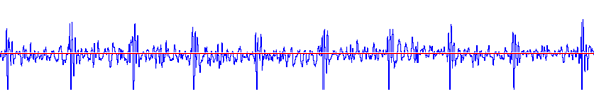

In [2]:
#image = Image.open('3M.bmp')
image = Image.open('3M_zgh_s.bmp')
image

In [3]:
x = image.size[0]
y = image.size[1]

In [4]:
print(x)
print(y)

594
106


In [5]:
matrix = []
points = []
integrated_density = 0

for i in range(x):
    matrix.append([])
    for j in range(y):
        matrix[i].append(image.getpixel((i,j)))
        #integrated_density += image.getpixel((i,j))[1]
        #points.append(image.getpixel((i,j))[1])

### Extract Red Line Position

In [6]:
redMax = 0
xStore = 0
yStore = 0
for xAxis in range(x):
    for yAxis in range(y):
        currentPoint = matrix[xAxis][yAxis]
        if currentPoint[0] == 255 and currentPoint[1] < 10 and currentPoint[2] < 10:
            redMax = currentPoint[0]
            xStore = xAxis
            yStore = yAxis
            
print(xStore, yStore)

593 53


### Extract Blue Points

In [9]:
redline_pos = 53
gain = 120
absMax = 0
littmannArr = []
points_vertical = []
theOne = 0

for xAxis in range(x):
    for yAxis in range(y):
        currentPoint = matrix[xAxis][yAxis]
        # Pickup Blue points
        if currentPoint[2] == 255 and currentPoint[0] < 220 and currentPoint[1] < 220:
            points_vertical.append(yAxis)
            
    #print(points_vertical)
    
    
    # Choose the largest amplitude
    for item in points_vertical:
        
        if abs(item-redline_pos) > absMax:
            absMax = abs(item-redline_pos)
            theOne = item 
    littmannArr.append((theOne-redline_pos)*gain)
    
    absMax = 0  
    theOne = 0
    points_vertical = []

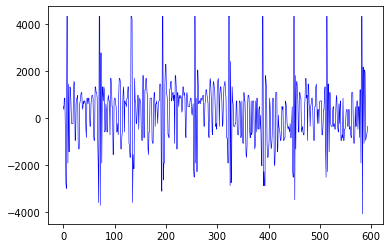

In [10]:
fig = plt.figure()
s = fig.add_subplot(111)
s.plot(littmannArr, linewidth=0.6, color='blue')

# Ascul Pi Data

In [11]:
pathBase = 'C://Users//triti//OneDrive//Dowrun//Text//Manuscripts//Data//ZhangGuohao//AusculPi//'
filename = 'Numpy_Array_File_2020-06-23_09_37_45.npy'
line = pathBase + filename
arr = np.load(line)
arr

array([[    3,   525,   518, ...,    59,    97,    50],
       [   59,    22,     8, ...,   253,   206,   201],
       [  249,   271,   356, ...,   364,   341,   343],
       ...,
       [ 6401,  6395,  6372, ..., -4427, -4454, -4471],
       [    1,  3069,  3059, ...,  2223,  2165,  2166],
       [ 2164,  2136,  2093, ..., -6947, -6966, -6959]], dtype=int16)

In [12]:
arr.shape

(2583, 512)

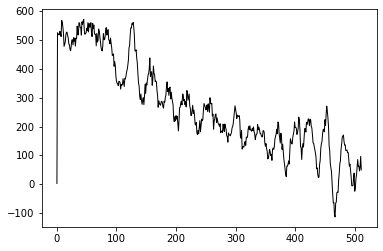

In [13]:
fig = plt.figure()
s = fig.add_subplot(111)
s.plot(arr[0], linewidth=1.0, color='black')

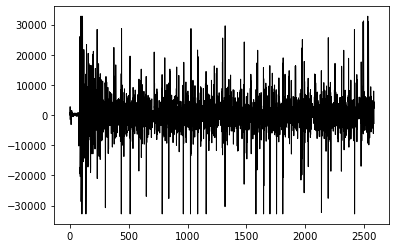

In [14]:
fig = plt.figure()
s = fig.add_subplot(111)
s.plot(arr[:,200], linewidth=1.0, color='black')

In [15]:
start = 1110
end = 1800

start_adj = int(start * 2583 / 3000)
end_adj = int(end * 2583 / 3000)

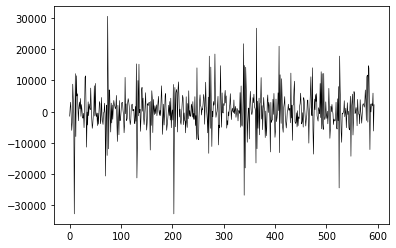

In [16]:
fig = plt.figure()
s = fig.add_subplot(111)
s.plot(arr[start_adj:end_adj,115], linewidth=0.6, color='black')

In [17]:
start_adj-end_adj

-594

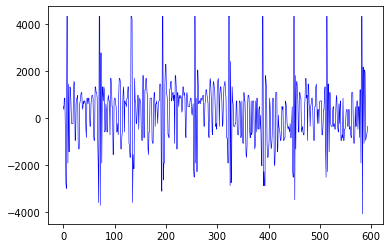

In [18]:
fig = plt.figure()
s = fig.add_subplot(111)
s.plot(littmannArr, linewidth=0.6, color='blue')

In [19]:
asculArr = arr[start_adj:end_adj,115]

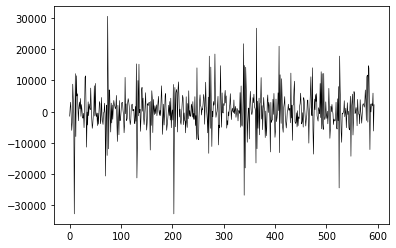

In [20]:
fig = plt.figure()
s = fig.add_subplot(111)
s.plot(asculArr, linewidth=0.6, color='black')

## Preprocess the two array

In [21]:
asculArr_processed = []
littmannArr_processed = []

for ascul in asculArr:
    asculArr_processed.append(math.fabs(ascul))
    
for item in littmannArr:
    littmannArr_processed.append(math.fabs(item))

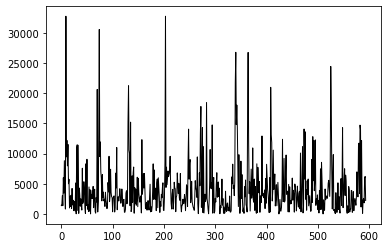

In [22]:
fig = plt.figure()
s = fig.add_subplot(111)
s.plot(asculArr_processed, linewidth=1.0, color='black')

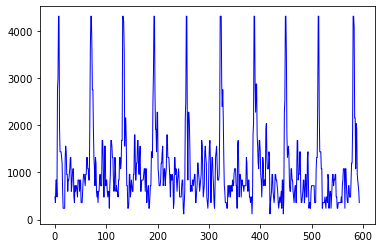

In [23]:
fig = plt.figure()
s = fig.add_subplot(111)
s.plot(littmannArr_processed, linewidth=1.0, color='blue')

In [24]:
len(littmannArr)

594

In [25]:
len(asculArr)

594

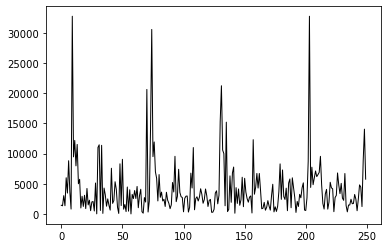

In [51]:
fig = plt.figure()
s = fig.add_subplot(111)
s.plot(asculArr_processed[:250], linewidth=1.0, color='black')

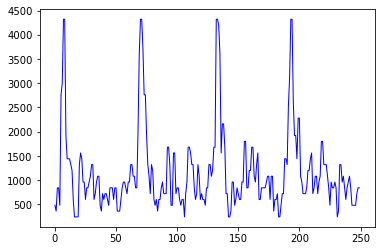

In [50]:
fig = plt.figure()
s = fig.add_subplot(111)
s.plot(littmannArr_processed[:250], linewidth=1.0, color='blue')

### Coeffient

In [43]:
stats.pearsonr(asculArr_processed, littmannArr_processed)

(0.036991408639358486, 0.3681373596775619)

In [52]:
stats.pearsonr(asculArr_processed[:250], littmannArr_processed[:250])

(0.19668221520914134, 0.0017791852462760412)

### Fitness

In [26]:
stats.chisquare(asculArr_processed[:80], littmannArr_processed[2:82])

Power_divergenceResult(statistic=722028.114779749, pvalue=0.0)

In [27]:
def cosCalculate(a, b):
    l = len(a)
    
    sumXY = 0
    sumRootXSquare = 0
    sumRootYSquare = 0
    
    for i in range(l):
        sumXY = sumXY + a[i]*b[i]
        sumRootXSquare = sumRootXSquare + math.sqrt(a[i]**2)
        sumRootYSquare = sumRootYSquare + math.sqrt(b[i]**2)
        
    cosValue = sumXY / (sumRootXSquare * sumRootYSquare)
    
    return cosValue    

In [28]:
cosCalculate(asculArr_processed, littmannArr_processed)

0.006115652405443805